<a href="https://colab.research.google.com/github/showman-sharma/taxi-v3-learning/blob/main/PA3_VSS_TZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import random
import numpy as np
import random
import gym
import glob
import io
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [124]:
#Setting up the environment
env = gym.make('Taxi-v3')

env.reset()

#Current State
print(env.s)

# 5x5x5x4 grid = 500 states
print ("Number of states:", env.observation_space.n)

# Primitive Actions
action = ["south", "north", "east", "west","pick","drop"]
#correspond to [0,1,2,3,4,5] that's actually passed to the environment

# either go left, up, down or right
print ("Number of actions that an agent can take:", env.action_space.n)

# Example Transitions
rnd_action = random.randint(0, 3)
print ("Action taken:", action[rnd_action])
next_state, reward, is_terminal, t_prob = env.step(rnd_action)
print ("Transition probability:", t_prob)
print ("Next state:", next_state)
print ("Reward recieved:", reward)
print ("Terminal state:", is_terminal)

state = env.reset()
print ("Decoded state:", list(env.decode(state)))
# env.render()

266
Number of states: 500
Number of actions that an agent can take: 6
Action taken: east
Transition probability: {'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)}
Next state: 286
Reward recieved: -1
Terminal state: False
Decoded state: [4, 2, 2, 1]


C:\Users\revan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\revan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\revan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gym\utils\passive_env_checker.py:241: DeprecationWarning: `np

# Epsilon Greedy

In [125]:
def egreedy_policy(q_values,state,epsilon):
  if q_values[state].any() and random.random() > epsilon:
    #print('greedy', np.argmax(q_values[state]),q_values.shape)
    return np.argmax(q_values[state])
  choice = random.randint(0,q_values.shape[-1]-1)  
  #print('random',choice,q_values.shape)  
  return choice

# Task 2
SMDP Q-Learning, Q-table and update frequency. 

In [126]:
from IPython.display import clear_output
import time

## Fully deterministic policy

In [127]:
policyOptionR = np.array([[1,3,0,0,0],
                 [1,3,0,0,0],
                 [1,3,3,3,3],
                 [1,1,1,1,1],
                 [1,1,1,1,1]
                 ])
policyOptionG = np.array([[0,0,2,2,1],
                 [0,0,2,2,1],
                 [2,2,2,1,1],
                 [1,2,1,1,1],
                 [1,2,1,1,1]
                 ])
policyOptionY = np.array([[0,3,0,0,0],
                          [0,3,0,0,0],
                          [0,3,3,3,3],
                          [0,1,1,1,3],
                          [0,1,3,1,3]
                          ])
policyOptionB = np.array([[0,0,0,0,3],
                          [0,0,0,0,3],
                          [2,2,2,0,3],
                          [1,1,1,0,3],
                          [1,1,1,0,3]
                          ])
policyOpt = [policyOptionR,policyOptionG,policyOptionY,policyOptionB]

In [128]:
#Fully deterministic
rewards = []

#Dictionary of Locations and their cell coordinates
goal = {0:[0,0],1:[0,4],2:[4,0],3:[4,3]}
Neps = 1500
for i in range(1,Neps+1):
  state = env.reset()
  done = False
  total_reward = 0
  while not done:
    x,y,passenger,drop = env.decode(state)
    
    #Step 1 : Go to the Passenger.
    foundPassenger = False
    while not foundPassenger and not done:
      optact = policyOpt[passenger][x,y]
      state, reward, done,_ = env.step(optact)
      total_reward += reward
      x,y,passenger,drop = env.decode(state)
      if x == goal[passenger][0] and y==goal[passenger][1]:
        foundPassenger = True


    #Step 2 : Pick up the Passenger.
    optact = 4
    state, reward, done,_ = env.step(optact)
    total_reward += reward

    #Step 3 : Go to the Drop location.
    x,y,passenger,drop = env.decode(state)
    foundDrop = False
    while not foundDrop and not done:
      optact = policyOpt[drop][x,y]
      state, reward, done,_ = env.step(optact)
      total_reward += reward
      x,y,passenger,drop = env.decode(state)
      if x == goal[drop][0] and y==goal[drop][1]:
        foundDrop = True

    #Step 4 : Drop off the Passenger.
    optact = 5
    state, reward, done,_ = env.step(optact)
    total_reward += reward   

  rewards.append(total_reward)   

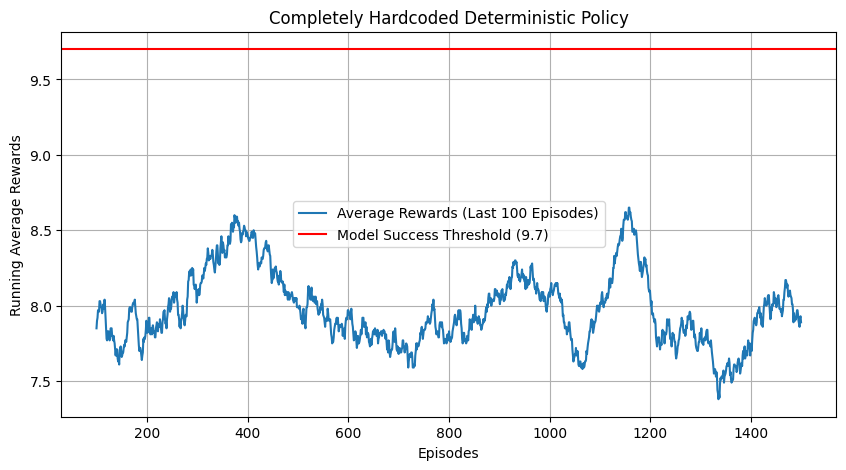

In [129]:
plt.figure(figsize = (10,5))
average_rewards_1 = [np.average(rewards[i:i+100]) for i in range(len(rewards)-100)]
plt.plot(range(100,len(rewards)),average_rewards_1,label = 'Average Rewards (Last 100 Episodes)')
plt.axhline(y = 9.7, color = "r", linestyle = "-", label = "Model Success Threshold (9.7)")
plt.xlabel('Episodes')
plt.ylabel('Running Average Rewards')
plt.title('Completely Hardcoded Deterministic Policy')
plt.legend()
plt.grid(True)
plt.show()

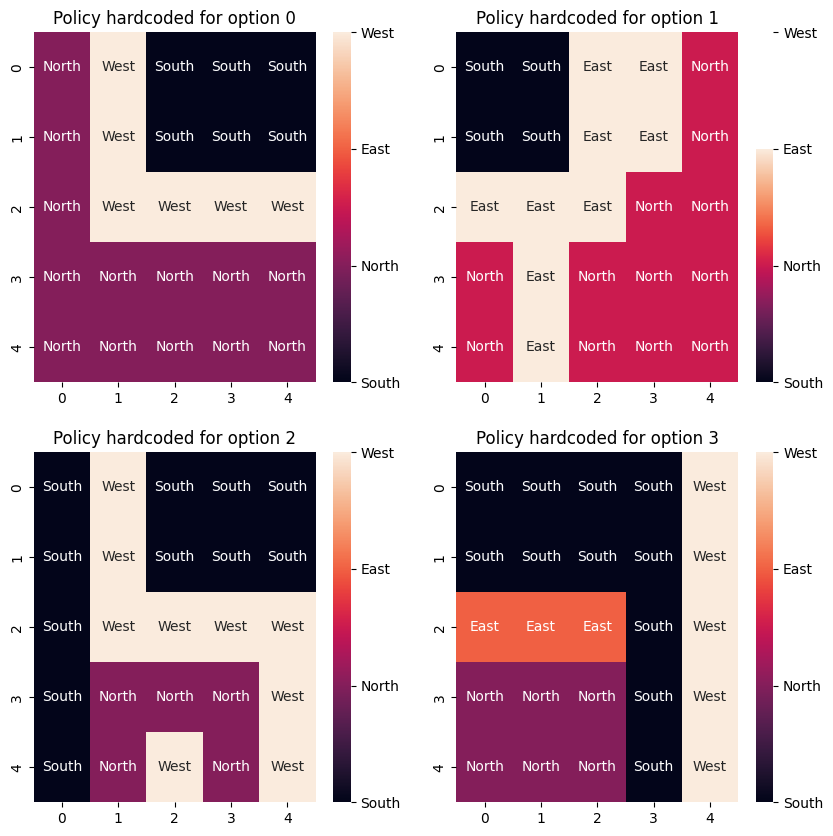

In [130]:
figure, axis = plt.subplots(2,2,figsize=(10,10))
for i in range(2):
  for j in range(2):
    labels = {0:'South',1:'North', 2:'East', 3:'West'}
    annot_text = np.vectorize(labels.get)((policyOpt[2*i+j]))
    ax = sns.heatmap((policyOpt[2*i+j]),ax=axis[i,j],annot = annot_text,fmt='')
    axis[i,j].set_title("Policy hardcoded for option {}".format(i*2+j)) 
    c_bar = ax.collections[0].colorbar
    c_bar.set_ticks([i for i in range(4)])
    c_bar.set_ticklabels(['South','North','East','West'])


## Deterministic policy over options with Q-learning Option policies

Option Definition

In [131]:
#Number of Options
Nopt = 4

#Dictionary of Locations and their cell coordinates
goal = {0:[0,0],1:[0,4],2:[4,0],3:[4,3]}

def Option(env,state,Q,goalNum,eps=0.1,goal = goal):
  optdone = False
  x,y,passenger,drop = env.decode(state)
  optact = 0
  if (x==goal[goalNum][0] and y==goal[goalNum][1]):
      #print('Reached ',goalNum)
      optdone = True 
      if passenger == goalNum:
        optact = 4
      elif drop == goalNum:
        optact = 5 
      else:   
        # optact = 1 if (goalNum in [0,1]) else 0
        pass
  else:
    optact = egreedy_policy(Q[goalNum], 5*x+y, epsilon=eps) 
  return [optact,optdone]

Training Loop

In [132]:
rewards = []
#Dictionary of Locations and their cell coordinates
goal = {0:[0,0],1:[0,4],2:[4,0],3:[4,3]}


#Hyperparameters
gamma = 0.9
alpha = 0.1
T = 1

#Q-values for each option
Qopt = {i:np.zeros((env.observation_space.n//20,env.action_space.n-2)) for i in range(Nopt)}

#Epsilon
eps = {i:0.1 for i in range(Nopt)}
eps_min = 0.01
eps_decay = 0.99
count = 0

Neps = 1500

for i in range(1,Neps+1):
  state = env.reset()
  done = False
  total_reward = 0
  while not done:
    x,y,passenger,drop = env.decode(state)
    
    #Step 1 : Reach the Passenger and Pick Up.
    foundPassenger = False
    option = passenger
    while not foundPassenger and not done and (passenger<4):

      optact,foundPassenger = Option(env,state,Qopt,option,eps[option])
      [x,y,_,_]=  list(env.decode(state))  

      next_state, reward, done,_ = env.step(optact)
      [x1,y1,_,_]=  list(env.decode(next_state)) 

      total_reward+=reward

      eps[option] = max(eps_min,eps_decay*eps[option])
      total_reward+=reward
      reward_surr = reward
      if foundPassenger:
        reward_surr = 20
      if optact<4:  
        Qopt[option][5*x+y, optact] = Qopt[option][5*x+y, optact] + alpha*(reward_surr + gamma*np.max(Qopt[option][5*x1+y1, :]) - Qopt[option][5*x+y, optact])
      state = next_state

    #Step 2 : Go to Drop Location and Drop off Passenger.
    x,y,passenger,drop = env.decode(state)
    foundDrop = False
    option = drop
    while not foundDrop and not done:
      optact,foundDrop = Option(env,state,Qopt,option,eps[option])
      
      x,y,_,_=  env.decode(state) 

      next_state, reward, done,_ = env.step(optact)
      x1,y1,_,_=  env.decode(next_state) 

      total_reward+=reward

      eps[option] = max(eps_min,eps_decay*eps[option])
      total_reward+=reward
      reward_surr = reward
      if foundDrop:
        reward_surr = 20
      if optact<4:  
        Qopt[option][5*x+y, optact] += alpha*(reward_surr + gamma*np.max(Qopt[option][5*x1+y1, :]) - Qopt[option][5*x+y, optact])
      state = next_state

  rewards.append(total_reward)   

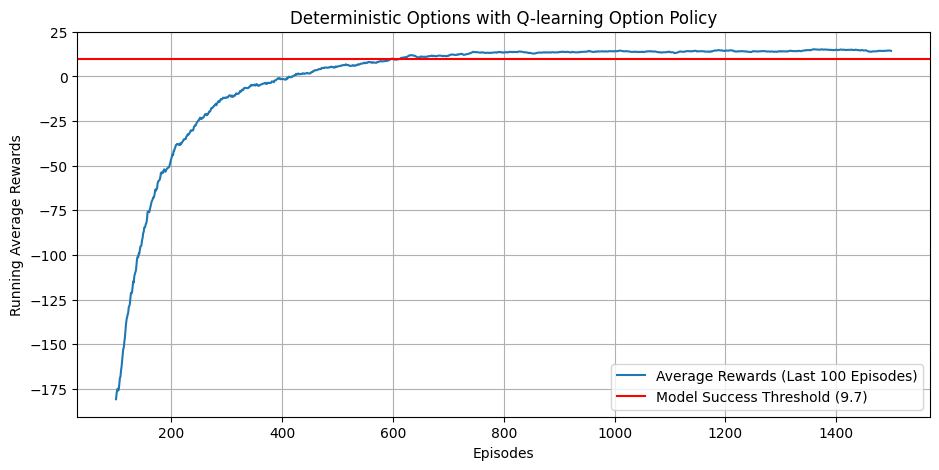

In [133]:
plt.figure(figsize = (11,5))
average_rewards_2 = [np.average(rewards[i:i+100]) for i in range(len(rewards)-100)]
plt.plot(range(100,len(rewards)),average_rewards_2,label = 'Average Rewards (Last 100 Episodes)')
plt.axhline(y = 9.7, color = "r", linestyle = "-", label = "Model Success Threshold (9.7)")
plt.xlabel('Episodes')
plt.ylabel('Running Average Rewards')
plt.title('Deterministic Options with Q-learning Option Policy')
plt.legend()
plt.grid(True)
plt.show()

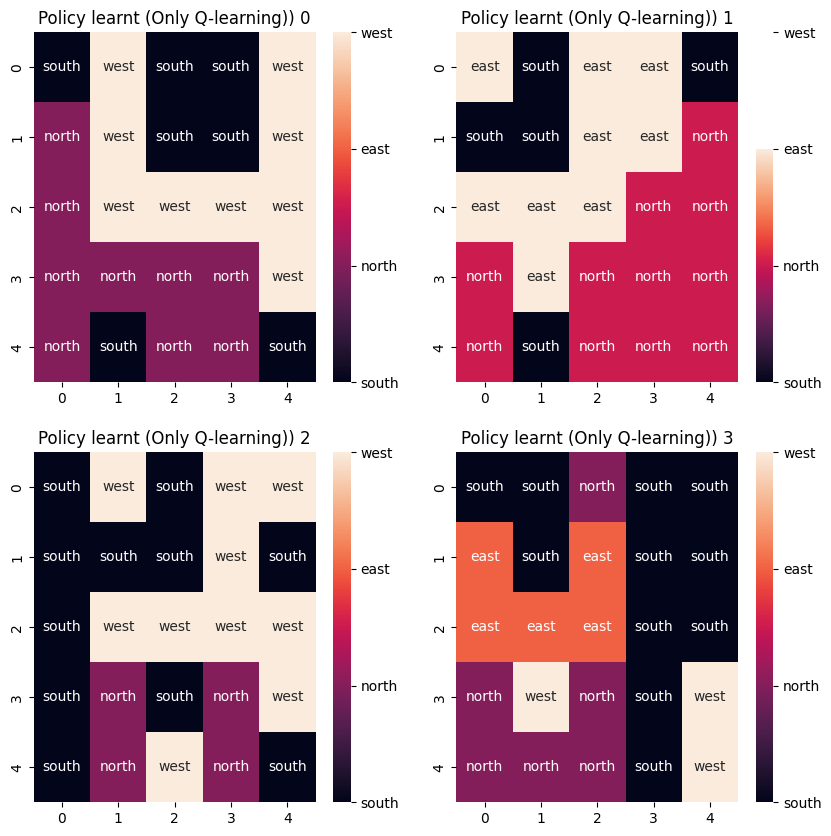

In [134]:
figure, axis = plt.subplots(2,2,figsize=(10,10))
for i in range(2):
  for j in range(2):
    labels = {0:'south',1:'north', 2:'east', 3:'west'}
    annot_text = np.vectorize(labels.get)(np.argmax(Qopt[2*i+j],axis=1).reshape(5,5))
    ax = sns.heatmap(np.argmax(Qopt[2*i+j],axis=1).reshape(5,5),ax=axis[i,j],annot = annot_text,fmt='')
    axis[i,j].set_title("Policy learnt (Only Q-learning)) {}".format(i*2+j))
    c_bar = ax.collections[0].colorbar
    c_bar.set_ticks([i for i in range(4)])
    c_bar.set_ticklabels(['south','north','east','west'])


# IOQL

We learn the policy by using a compressed state space of size Passenger_positions x Drop_locations (5 x 4). Since the option termination is deterministic, we can use this to improve our training efficiency by updating Q-values for these 20 substates, with each substate being a passenger-drop combination.

In [153]:
rewards = []
T = 1

#Dictionary of Locations and their cell coordinates
goal = {0:[0,0],1:[0,4],2:[4,0],3:[4,3]}

#Hyperparameters
gamma = 0.9
alpha = 0.1

#Environment Variables
nX = 5; nY = 5; nPas = 5; nDrop = 4; Nopt = 4

#Define IOQL Q-Values Table and Update Table
q_values_IOQL = np.zeros((nPas*nDrop,Nopt))
updates_IOQL = np.zeros((nPas*nDrop,Nopt))

#State to Substate conversion
def Sub(state, nPas = nPas, nDrop = nDrop):
  _,_,passenger,drop = env.decode(state) 
  subState = nDrop*passenger+drop 
  return subState 


#Q-values for each option
Qopt = {i:np.zeros((env.observation_space.n//20,env.action_space.n-2)) for i in range(Nopt)}

#Epsilon
eps = {i:0.01 for i in range(Nopt)}
eps_min = 0.01
eps_decay = 0.99
eps_main = 0.5

Neps = 1500

#Run Episode Loop
for i in range(Neps):
    state = env.reset()    
    done = False
    total_reward=0

    #While episode is running:
    while not done:
        
        #Choose an action  
        _,_,passenger,drop = env.decode(state) 
        subState = nDrop*passenger+drop      
        action = egreedy_policy(q_values_IOQL, subState, epsilon=eps_main)

        #Update Epsilon
        eps_main = max(eps_min,eps_main*eps_decay)
        
        option = action
        optdone = False
        prev = state  

        #While Option is in effect:
        while not optdone and not done:
            
            optact,optdone = Option(env,state,Qopt,option,eps[option])
            next_state, reward, done,_ = env.step(optact)
            
            total_reward+=reward

            
            #Option Policy Learning
            [x,y,_,_]=  list(env.decode(state)) 
            [x1,y1,_,_]=  list(env.decode(next_state)) 

            
            eps[option] = max(eps_min,eps_decay*eps[option])
            total_reward+=reward
            reward_surr = reward
            if optdone:
              reward_surr = 20

            #Update Qopt if action is not pickup/drop
            if optact<4:  
              Qopt[option][5*x+y, optact] += alpha*(reward_surr + gamma*np.max(Qopt[option][5*x1+y1, :]) - Qopt[option][5*x+y, optact])
            

            for o in range(Nopt):
              optact_o,optdone_o = Option(env,state,Qopt,o,eps[o])
              if optact_o == optact:
                eps[o] = max(eps_min,eps_decay*eps[o])
                if optdone_o:
                  q_values_IOQL[Sub(state), o] += alpha*(reward + gamma*np.max(q_values_IOQL[Sub(next_state), :]) - q_values_IOQL[Sub(state), o])
                else:
                  q_values_IOQL[Sub(state), o] += alpha*(reward + gamma*q_values_IOQL[Sub(next_state), o] - q_values_IOQL[Sub(state), o]) 

                updates_IOQL[Sub(state), o] += 1

            #Update state
            state = next_state 
        
    rewards.append(total_reward)
    x,y,passenger,drop = env.decode(state)

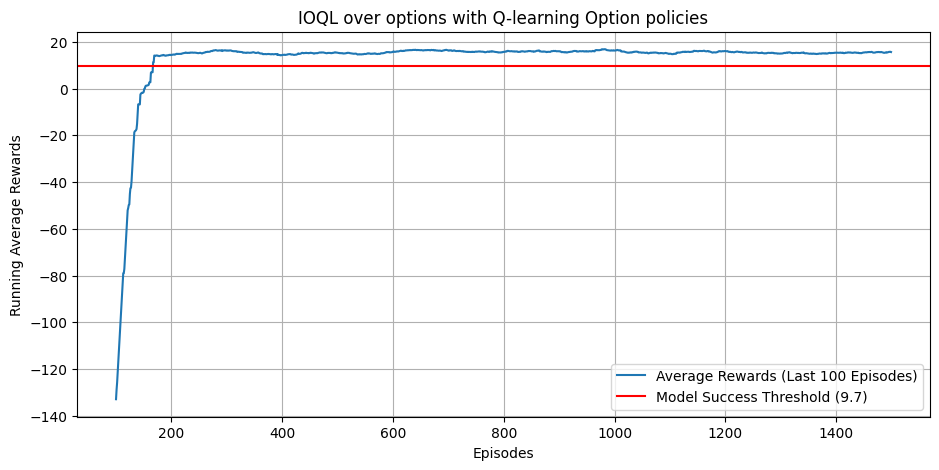

In [154]:
plt.figure(figsize = (11,5))
average_rewards_3 = [np.average(rewards[i:i+100]) for i in range(len(rewards)-100)]
plt.plot(range(100,len(rewards)),average_rewards_3,label = 'Average Rewards (Last 100 Episodes)')
plt.axhline(y = 9.7, color = "r", linestyle = "-", label = "Model Success Threshold (9.7)")
plt.xlabel('Episodes')
plt.ylabel('Running Average Rewards')
plt.title('IOQL over options with Q-learning Option policies')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Learnt Options for IOQL State Space')

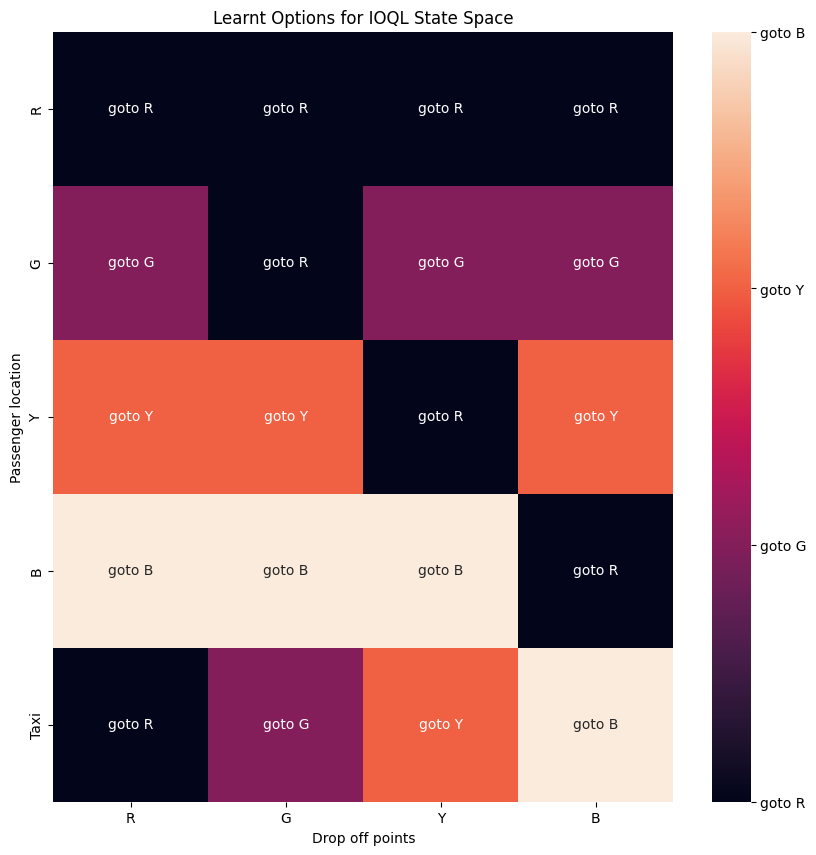

In [144]:
Qmax_IOQL = np.argmax(q_values_IOQL,axis = 1).reshape(5,4)
labels = {0:'goto R',1:'goto G', 2:'goto Y', 3:'goto B'}
annot_text = np.vectorize(labels.get)(Qmax_IOQL)

figure, axis = plt.subplots(1, 1,figsize=(10,10))
ax = sns.heatmap(Qmax_IOQL,ax=axis,xticklabels = ["R","G","Y","B"],yticklabels = ['R','G','Y','B','Taxi'],annot = annot_text, fmt = '')
c_bar = ax.collections[0].colorbar
c_bar.set_ticks([i for i in range(4)])

c_bar.set_ticklabels(['goto R','goto G', 'goto Y', 'goto B'])
axis.set_xlabel('Drop off points')
axis.set_ylabel("Passenger location")
axis.set_title('Learnt Options for IOQL State Space')

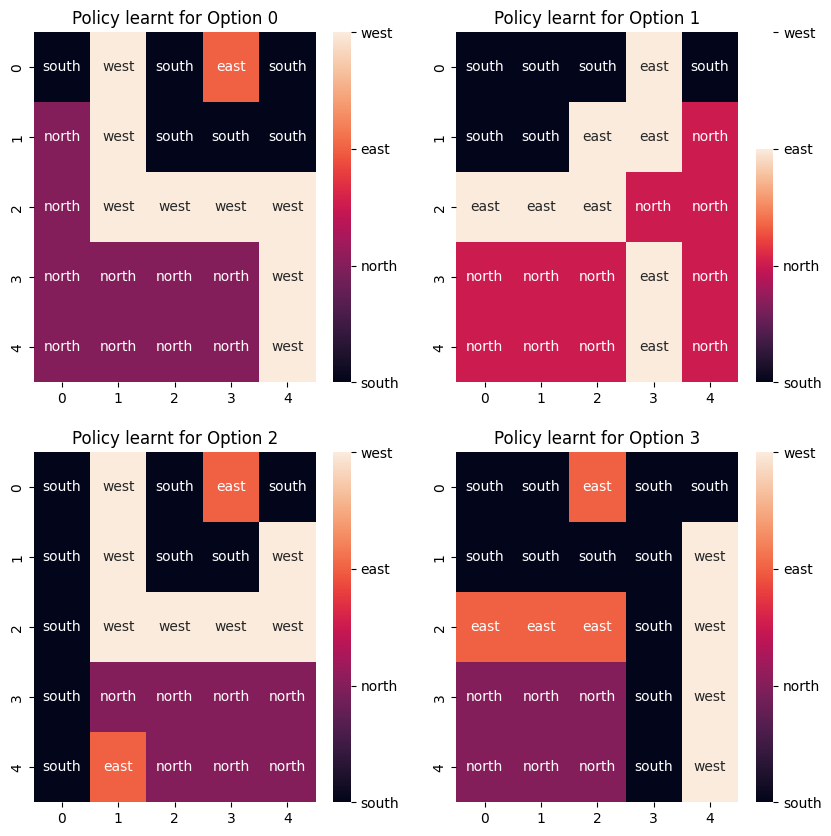

In [140]:
figure, axis = plt.subplots(2,2,figsize=(10,10))
for i in range(2):
  for j in range(2):
    labels = {0:'south',1:'north', 2:'east', 3:'west'}
    annot_text = np.vectorize(labels.get)(np.argmax(Qopt[2*i+j],axis=1).reshape(5,5))
    ax = sns.heatmap(np.argmax(Qopt[2*i+j],axis=1).reshape(5,5),ax=axis[i,j],annot = annot_text,fmt='')
    axis[i,j].set_title("Policy learnt for Option {}".format(i*2+j))
    c_bar = ax.collections[0].colorbar
    c_bar.set_ticks([i for i in range(4)])
    c_bar.set_ticklabels(['south','north','east','west'])
   

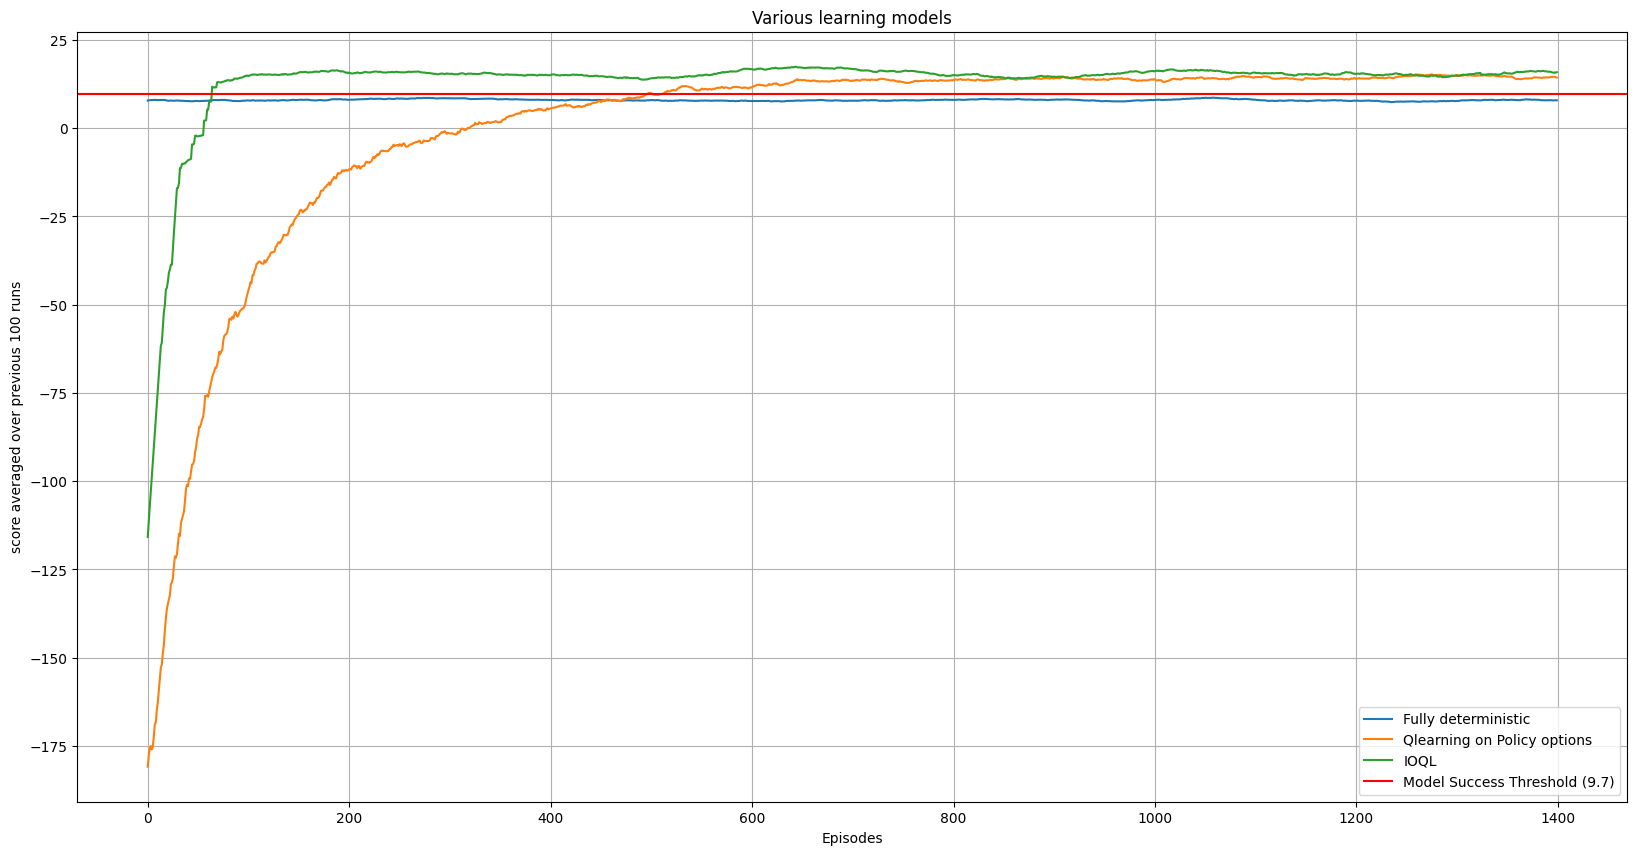

In [139]:
plt.figure(figsize = (20,10))
plt.plot(average_rewards_1,label = 'Fully deterministic')
plt.plot(average_rewards_2,label = 'Qlearning on Policy options')
plt.plot(average_rewards_3,label = 'IOQL')
plt.axhline(y = 9.7, color = "r", linestyle = "-", label = "Model Success Threshold (9.7)")
plt.title('Deterministic Options with Q-learning Option Policy')
plt.xlabel('Episodes')
plt.ylabel('score averaged over previous 100 runs')
plt.title('Various learning models')
plt.legend()
plt.grid(True)
plt.show()